In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [60]:
dataset = pd.read_csv("prices.csv")
dataset

,area,prices
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [61]:
x_train=dataset["area"]
y_train=dataset["prices"]

In [62]:
x_train

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: area, dtype: float64

In [63]:
y_train

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: prices, dtype: float64

In [64]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))
m=len(x_train)

The shape of x_train is: (5,)
The shape of y_train is:  (5,)
Number of training examples (m): 5


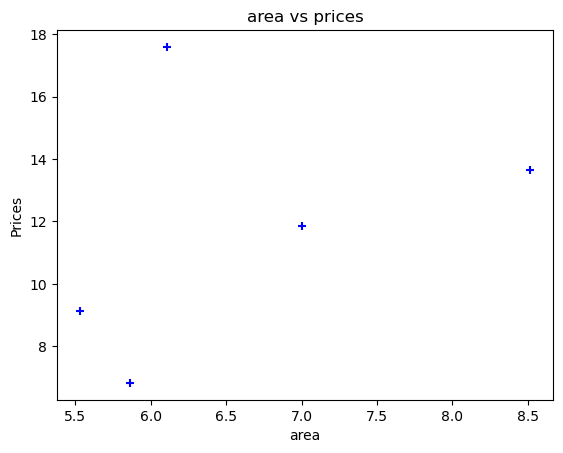

In [77]:
plt.scatter(x_train, y_train, marker='+', c='b') 
plt.title("area vs prices")
plt.ylabel('Prices')
plt.xlabel('area')
plt.show()

In [78]:
# cost function
def cost_func(w,b,x_train,y_train):
    cost=0
    total_cost=0
    for i in range(m):
        fwb=(x_train[i]*w)+b
        cost+=(fwb-y_train[i])**2
    total_cost=cost/(2.0*m)
    return total_cost

In [86]:
def gradient(w,b,x,y):
    dj_dw=0
    dj_db=0
    for i in range(m):
        fwb=(x[i]*w)+b
        dj_dw+=(fwb-y[i])*x[i]
        dj_db+=(fwb-y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw,dj_db
        

In [87]:
def descent(w_in,b_in,x,y,cost_func,gradient,l,iterations,m):
    J_history = []
    w_history = []
    w = w_in
    b = b_in
    
    for i in range(iterations):
        dj_dw, dj_db = gradient(w,b,x,y)  
        w = w - l * dj_dw               
        b = b - l * dj_db               
        if i<100000:    
            cost =  cost_func(w,b,x,y)
            J_history.append(cost)

        if i% math.ceil(iterations/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}  ")
        
    return w, b, J_history, w_history

In [88]:
initial_w = 0.
initial_b = 0.
iterations = 1500
alpha = 0.01
w,b,_,_ = descent( initial_w, initial_b, x_train ,y_train,
                     cost_func,gradient, alpha, iterations,m)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost    26.87  
Iteration  150: Cost     6.09  
Iteration  300: Cost     6.08  
Iteration  450: Cost     6.07  
Iteration  600: Cost     6.07  
Iteration  750: Cost     6.06  
Iteration  900: Cost     6.05  
Iteration 1050: Cost     6.05  
Iteration 1200: Cost     6.04  
Iteration 1350: Cost     6.04  
w,b found by gradient descent: 1.5878591148635817 1.2706734775735502


In [89]:
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'area')

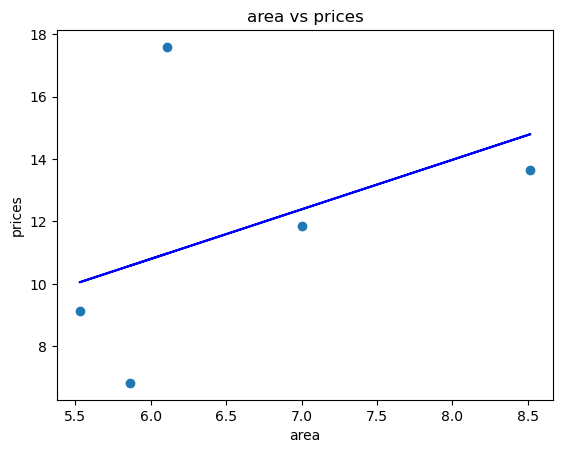

In [90]:
plt.plot(x_train, predicted, c = "b")
plt.scatter(x_train,y_train)
plt.title("area vs prices")
plt.ylabel('prices')
plt.xlabel('area')

<AxesSubplot:xlabel='area', ylabel='prices'>

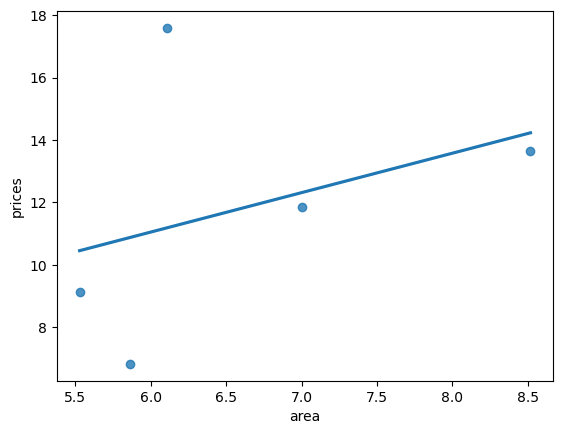

In [91]:
sns.regplot(x_train, y_train,ci=None)

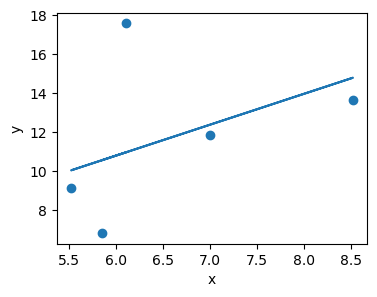

In [92]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x_train, y_train)
ax.plot(x_train, predicted)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

plt.show()